**Imputing = handling missing data by replacing it with a value**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


## Using Pandas

In [5]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [10]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [11]:
age_mean = X_train['Age'].mean()
age_median = X_train['Age'].median()

In [12]:
X_train['Age_mean'] = X_train['Age'].fillna(age_mean)
X_train['Age_median'] = X_train['Age'].fillna(age_median)

X_train['Fare_mean'] = X_train['Fare'].fillna(age_mean)
X_train['Fare_median'] = X_train['Fare'].fillna(age_median)

In [13]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
46,NaN,15.5000,1,29.785904,28.75,15.5000,15.5000
404,20.0,8.6625,0,20.000000,20.00,8.6625,8.6625
767,30.5,7.7500,0,30.500000,30.50,7.7500,7.7500
360,40.0,27.9000,5,40.000000,40.00,27.9000,27.9000
737,35.0,512.3292,0,35.000000,35.00,512.3292,512.3292


In [14]:
print('Original Age Variance :',X_train['Age'].var())
print('Age Variance after mean imputation :',X_train['Age_mean'].var())
print('Age Variance after median imputation :',X_train['Age_median'].var())
print(50*"-")
print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after mean imputation :',X_train['Fare_mean'].var())
print('Fare Variance after median imputation :',X_train['Fare_median'].var())

Original Age Variance : 204.34951339046142
Age Variance after mean imputation : 161.81262452718676
Age Variance after median imputation : 161.98956633460548
--------------------------------------------------
Original Fare variable variance:  2448.1979137063163
Fare Variance after mean imputation : 2324.623996772902
Fare Variance after median imputation : 2324.957613614932


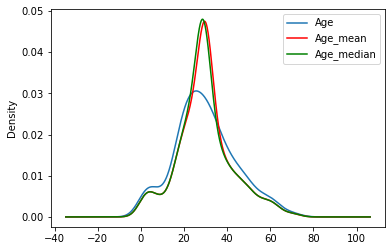

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax)
X_train['Age_mean'].plot(kind='kde',ax=ax,color='red')
X_train['Age_median'].plot(kind='kde',ax=ax,color='green')

# add labels
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

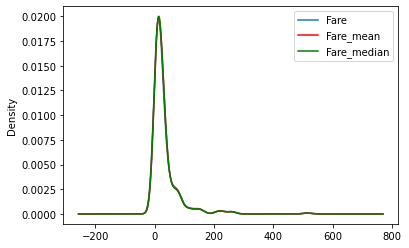

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde',ax=ax)
X_train['Fare_mean'].plot(kind='kde',ax=ax,color='red')
X_train['Fare_median'].plot(kind ='kde',ax=ax,color='green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [17]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.383530,66.280487
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.399278,16.404484
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.565299,52.483705
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,54.793876,54.710043
Fare_mean,66.383530,2448.197914,16.399278,52.565299,54.793876,2324.623997,2324.765012
Fare_median,66.280487,2448.197914,16.404484,52.483705,54.710043,2324.765012,2324.957614


In [18]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.089754,0.089604
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205660,0.205710
Age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.085707,0.085568
Age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089292,0.089149
Fare_mean,0.089754,1.000000,0.205660,0.085707,0.089292,1.000000,0.999989
Fare_median,0.089604,1.000000,0.205710,0.085568,0.089149,0.999989,1.000000


<AxesSubplot:>

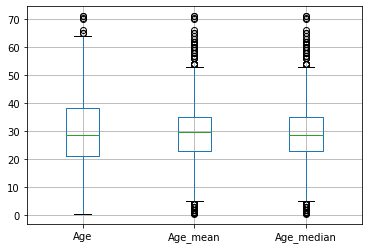

In [19]:
X_train[['Age','Age_mean','Age_median']].boxplot()

<AxesSubplot:>

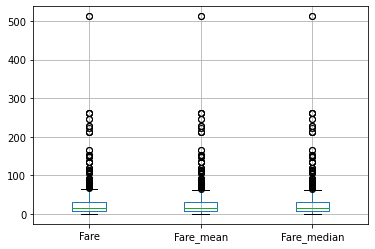

In [20]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

## Using sklearn

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [22]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [23]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [24]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [25]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [26]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

In [27]:
trf.named_transformers_['imputer1'].statistics_   #median value for age

array([28.75])

In [28]:
trf.named_transformers_['imputer2'].statistics_   # mean value for fare

array([32.61759689])